## Prediction using Decision Tree Algorithm

Riya Tasgaonkar

#### Import libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

#### Load Dataset

In [23]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['Target'] = iris.target

In [24]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [26]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [27]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Target'],
      dtype='object')

#### Plot for dataset

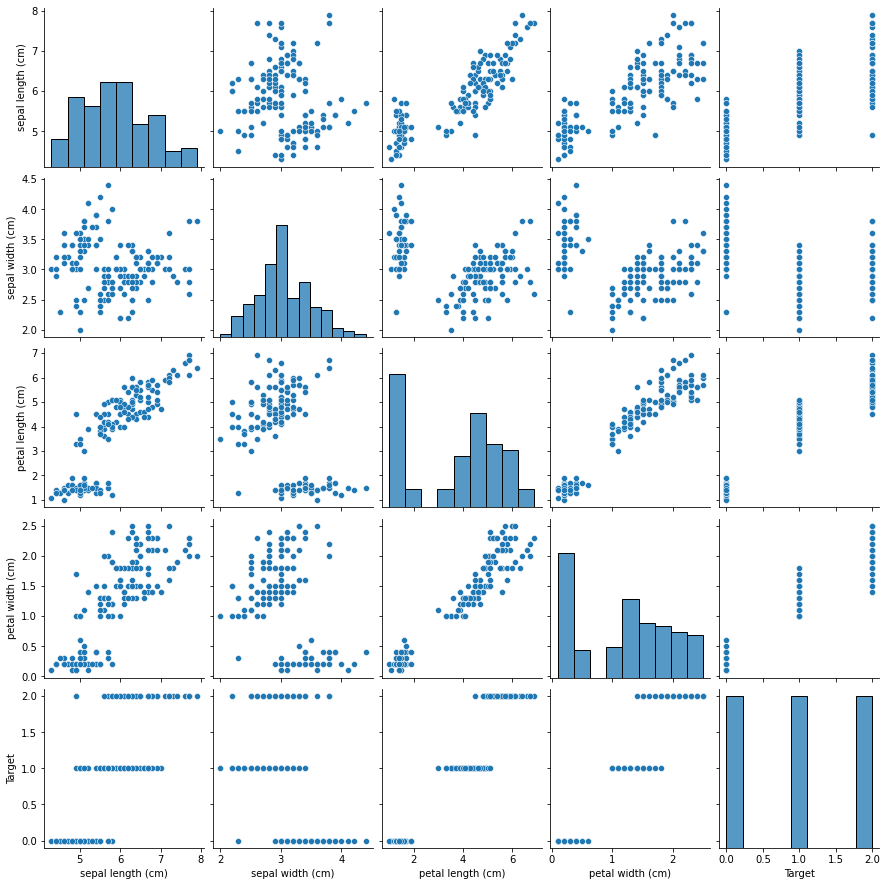

In [28]:
sns.pairplot(data = df)

#### Split for training and testing dataset

In [29]:
X, y = df.iloc[:, 0:4], df.iloc[:, 4]

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3)

#### Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(decisiontree, out_file=None, 
                                feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  
                                class_names='Species',
                                filled=True)
graph = graphviz.Source(dot_data, format="png")

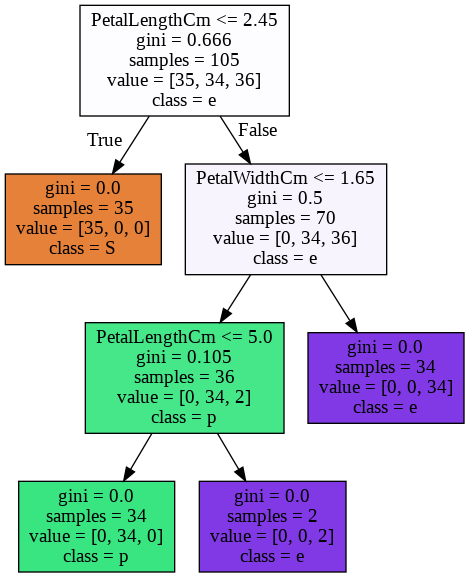

In [33]:
from graphviz import Source
from IPython.display import SVG
png_bytes = graph.pipe(format='png')
with open('dtree.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

#### Make predictions

In [34]:
y_pred = decisiontree.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix

confusionMatrix = confusion_matrix(y_test, y_pred)
confusionMatrix

array([[14,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 13]])

In [16]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        17
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

